In [2]:
import pandas as pd

event_log = pd.read_csv('user_activity.csv')

In [26]:
event_log.dropna(inplace=True)  

event_log['start'] = pd.to_datetime(event_log['start'])


event_log.sort_values(['case_id', 'start'], inplace=True)

event_log.reset_index(drop=True, inplace=True)
print(event_log)

    case_id               start activity  user_id
0        16 2017-09-01 09:00:00  Content    310.0
1        16 2017-09-01 10:00:00  Content    310.0
2        16 2017-09-01 11:00:00      Web    310.0
3        17 2017-09-02 09:00:00      Web    310.0
4        17 2017-09-02 10:00:00      Web    310.0
..      ...                 ...      ...      ...
130      s4 2017-09-30 10:00:00      Web    310.0
131      s4 2017-09-30 11:00:00  Nothing    310.0
132      s5 2017-10-01 09:00:00   EduRef    310.0
133      s5 2017-10-01 10:00:00  OpsProf    310.0
134      s5 2017-10-01 11:00:00  Content    310.0

[135 rows x 4 columns]


In [25]:
traces = {}
grouped = event_log.groupby('case_id')['activity'].apply(list)

for case_id, activities in grouped.items():

    traces[case_id] = activities

for case_id, activities in traces.items():
    print("Case ID:", case_id)
    print("Activities:", activities)
    print()

Case ID: 16
Activities: ['Content', 'Content', 'Web']

Case ID: 17
Activities: ['Web', 'Web', 'Content']

Case ID: 18
Activities: ['Content', 'Content', 'Web']

Case ID: 19
Activities: ['Web', 'Web', 'Content']

Case ID: 20
Activities: ['Content', 'Content', 'Web']

Case ID: 21
Activities: ['Web', 'Web', 'Content']

Case ID: 22
Activities: ['OpsProf', 'Web', 'Web', 'Content']

Case ID: 23
Activities: ['Web', 'Nothing', 'Nothing']

Case ID: 24
Activities: ['Web', 'Web', 'Content', 'Nothing']

Case ID: 25
Activities: ['Web', 'Web', 'Content']

Case ID: 26
Activities: ['Content', 'Content', 'Web']

Case ID: 27
Activities: ['Web', 'Web', 'Content']

Case ID: 28
Activities: ['Content', 'Content', 'Web']

Case ID: 29
Activities: ['Nothing', 'Web', 'Content']

Case ID: 30
Activities: ['Content', 'Content', 'Web']

Case ID: 31
Activities: ['Web', 'Web', 'Content']

Case ID: 32
Activities: ['Content', 'Content', 'Web']

Case ID: 33
Activities: ['Web', 'Web', 'Content']

Case ID: 34
Activities: 

In [6]:
traces=[]

grouped = event_log.groupby('case_id')['activity'].apply(lambda x: list(set(x)))

for _, activities in grouped.items():

    traces.append(tuple(activities))


print("Traces:", traces)

traces = list(list(traces))
print("Number of traces:", len(traces))

Traces: [('Content', 'Web'), ('Content', 'Web'), ('Content', 'Web'), ('Content', 'Web'), ('Content', 'Web'), ('Content', 'Web'), ('Content', 'OpsProf', 'Web'), ('Web', 'Nothing'), ('Content', 'Web', 'Nothing'), ('Content', 'Web'), ('Content', 'Web'), ('Content', 'Web'), ('Content', 'Web'), ('Content', 'Web', 'Nothing'), ('Content', 'Web'), ('Content', 'Web'), ('Content', 'Web'), ('Content', 'Web'), ('Content', 'Web'), ('Content', 'Web'), ('Content', 'OpsProf', 'Web'), ('Content', 'OpsProf', 'Web'), ('Content', 'OpsProf', 'Web', 'Nothing'), ('Content', 'Web'), ('Content', 'Web'), ('Content', 'Web'), ('Content', 'Web'), ('PlatMgmtOs', 'Web', 'FM', 'OpsProf'), ('Content', 'PlatMgmtOs', 'Nothing', 'OpsProf'), ('Content', 'Web'), ('OpsProf', 'Comm', 'FM', 'Nothing'), ('EduRef', 'Comm', 'Nothing'), ('FM', 'Nothing', 'EduRef', 'OpsProf', 'Comm'), ('HomeE11t', 'EduRef'), ('Web', 'EduRef', 'Comm'), ('Content', 'Web', 'Nothing'), ('Content', 'OpsProf'), ('Web', 'Comm', 'Nothing'), ('Web', 'Nothi

In [24]:
traces1= []

grouped = event_log.groupby('case_id')['activity'].apply(lambda x: list(set(x)))

for _, activities in grouped.items():
    traces1.append(tuple(activities))



traces1 = list(set(traces1))


print("Trace:", traces1)

traces = list(set(traces))
print("Number of traces1:", len(traces1))


Trace: [('Web', 'EduRef', 'Comm'), ('PlatMgmtOs', 'Web', 'FM', 'OpsProf'), ('Web', 'Nothing'), ('Content', 'Web', 'Nothing'), ('Content', 'PlatMgmtOs', 'Nothing', 'OpsProf'), ('OpsProf', 'Comm', 'FM', 'Nothing'), ('Content', 'OpsProf'), ('Content', 'OpsProf', 'Web', 'Nothing'), ('EduRef', 'OpsProf', 'Content'), ('Content', 'OpsProf', 'Web'), ('HomeE11t', 'EduRef'), ('Content', 'Web'), ('EduRef', 'Comm', 'Nothing'), ('Web', 'Comm', 'Nothing'), ('FM', 'Nothing', 'EduRef', 'OpsProf', 'Comm')]
Number of traces1: 15


In [8]:
import numpy as np

traces1 = list(set(traces1))


places = set()
for tpl in traces1:
    places.update(tpl)


num_places = len(places)


footprint_matrix = np.empty((num_places, num_places), dtype=object)
footprint_matrix[:] = '#'


for tpl in traces1:
    x = tpl[0]
    y = tpl[1]


    x_idx = list(places).index(x)
    y_idx = list(places).index(y)


    footprint_matrix[x_idx, y_idx] = '->'


for i in range(num_places):
    for j in range(num_places):
        if footprint_matrix[i, j] == '#' and i != j:
            for tpl in traces:
                x = tpl[0]
                y = tpl[1]


                x_idx = list(places).index(x)
                y_idx = list(places).index(y)

                if x_idx == i and y_idx == j:
                    footprint_matrix[i, j] = '#'


        if footprint_matrix[i, j] == '->' and footprint_matrix[j, i] == '->':
            footprint_matrix[i, j] = '||'

print(footprint_matrix)


[['#' '->' '#' '#' '#' '#' '#' '#' '#']
 ['#' '#' '#' '->' '->' '#' '->' '#' '#']
 ['#' '#' '#' '->' '#' '#' '#' '#' '#']
 ['#' '#' '#' '#' '#' '#' '#' '#' '#']
 ['#' '#' '#' '#' '#' '->' '->' '#' '#']
 ['#' '#' '#' '#' '#' '#' '->' '#' '#']
 ['#' '#' '#' '#' '#' '#' '#' '#' '#']
 ['#' '#' '#' '#' '->' '#' '#' '#' '#']
 ['->' '->' '#' '#' '#' '->' '#' '#' '#']]


In [9]:
#step1
Transaction = event_log['activity'].unique()

print("Transactions:" ,Transaction )

Transactions: ['Content' 'Web' 'OpsProf' 'Nothing' 'FM' 'PlatMgmtOs' 'Comm' 'EduRef'
 'HomeE11t']


In [10]:
Transaction = list(set(Transaction))
print("Number of Transaction:", len(Transaction))

Number of Transaction: 9


In [22]:
#step2
traces1 = list(set(traces1))
TI = set(activity[0] for activity in traces1)
print("TI:", TI)

TI: {'PlatMgmtOs', 'Web', 'FM', 'EduRef', 'OpsProf', 'HomeE11t', 'Content'}


In [23]:
#step3
TO = set(activity[-1] for activity in traces1)
print("TO:", TO)

TO: {'Web', 'Nothing', 'EduRef', 'OpsProf', 'Comm', 'Content'}


In [27]:
#step4
places = {}

grouped = event_log.groupby('case_id')['activity'].apply(lambda x: list(set(x)))

for _, activities in grouped.items():
    for i, activity in enumerate(activities):
        if i > 0 and i < len(activities) - 1:

            prev_activity = activities[i - 1]
            next_activity = activities[i + 1]     

            if activity not in places:
                places[activity] = set()

            if prev_activity in places[activity]:
                places[activity].remove(prev_activity)
            
            places[activity].add(next_activity)

xl = set()
for activity, related_activities in places.items():
    for prev_activity in related_activities:
        if prev_activity not in places:
            xl.add((prev_activity, activity))
print("xl:",xl)

xl: {('Content', 'OpsProf')}


In [28]:
#step5

non_common_second_activities = {}
common_first_activities = set()


for activity_tuple in xl:
    first_activity = activity_tuple[0]
    second_activity = activity_tuple[1]
    

    if second_activity not in non_common_second_activities:
        non_common_second_activities[second_activity] = set()
    non_common_second_activities[second_activity].add(first_activity)
    

    common_first_activities.add(first_activity)


YL = (common_first_activities, set(non_common_second_activities.keys()))


print("YL:", YL)

YL: ({'Content'}, {'OpsProf'})


In [41]:
#step6,7
FL = set()
TI = set(activity[0] for activity in traces1)
TO = set(activity[-1] for activity in traces1)
common_activities = YL[0]
non_common_activities = YL[1]

for activity in TI:
    FL.add(('il', activity))
for common_activity in common_activities:
    FL.add((common_activity,'PLACE1' )) 
for non_common_activity in non_common_activities:
    FL.add(('PLACE1', non_common_activity ))

for non_common_activity in non_common_activities:
    FL.add((non_common_activity, 'io' ))
for activity in TO:
    FL.add((activity, 'io'))

DIF = set()
for activity in TO:
    if activity not in TI:
        DIF.add(activity)
for activity in DIF:
    FL.add(('PLACE2',activity ))   

sorted_FL = sorted(FL, key=lambda x: (x[1] != 'il', x[1] != 'PLACE1', x[1] != 'PLACE2', x[1] != 'io'))

print("FL:", sorted_FL)

FL: [('Content', 'PLACE1'), ('Nothing', 'io'), ('OpsProf', 'io'), ('Content', 'io'), ('Web', 'io'), ('Comm', 'io'), ('EduRef', 'io'), ('il', 'HomeE11t'), ('il', 'Content'), ('il', 'OpsProf'), ('PLACE2', 'Nothing'), ('il', 'PlatMgmtOs'), ('il', 'Web'), ('PLACE1', 'OpsProf'), ('il', 'EduRef'), ('PLACE2', 'Comm'), ('il', 'FM')]


α(L) = (PL, TL , FL)


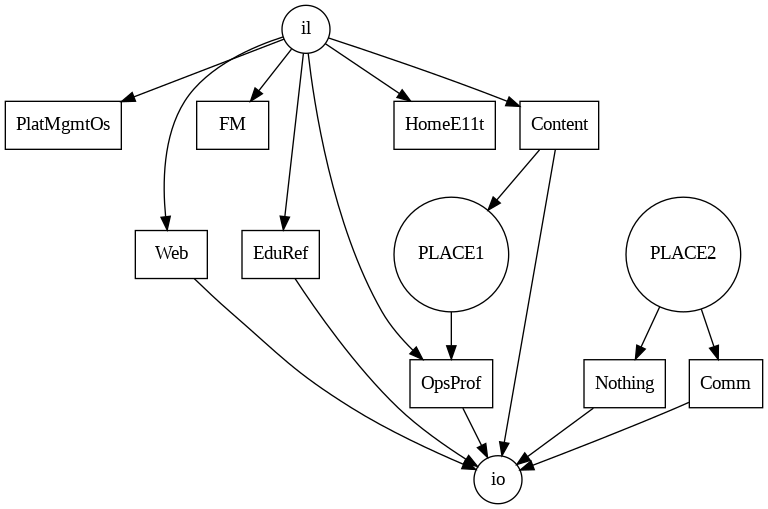

In [42]:
import pygraphviz as pgv
from IPython.display import Image
print("α(L) = (PL, TL , FL)")

graph = pgv.AGraph(directed=True)


PL = ['il', 'PLACE1','PLACE2', 'io']
for place in PL:
    graph.add_node(place, shape='circle')



TL =  {'Content', 'Web', 'OpsProf', 'Nothing', 'PlatMgmtOs', 'Comm', 'EduRef','HomeE11t', 'FM'}
for activity in TL:
    TL.add(activity)
    graph.add_node(activity, shape='box')

for activity, place in sorted_FL:
    graph.add_edge(activity, place)


graph.write('petri_net.dot')


graph.layout(prog='dot')
graph.draw('petri_net.png')


Image('petri_net.png')
